In [51]:
# Import necessary libraries
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical operations
import matplotlib.pyplot as plt    # For plotting
import seaborn as sns               # For data visualization
from sklearn.model_selection import train_test_split, cross_val_score   # For splitting the data and cross-validation
from sklearn.linear_model import LinearRegression, Ridge, Lasso   # For linear regression, ridge regression, and lasso regression
from sklearn.preprocessing import PolynomialFeatures      # For polynomial feature transformation
from sklearn.metrics import mean_squared_error, r2_score     # For evaluating the model performance

# Load the dataset
df = pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')
# 1. Data Cleaning and Preprocessing

# Check for missing values and handle them
print(df.isnull().sum())
df.dropna(inplace=True)



day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [52]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

In [53]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [54]:
#handling categorical feature classes
df["Classes"] = df["Classes"].map({'not fire   ':0,'fire   ':1,'fire':2, 'fire ':3, 'not fire':4, 'not fire ':5,
       'not fire     ':6, 'not fire    ':7})
df.head(8)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0


In [55]:
print(df.isnull().sum())
df.dropna(inplace=True)
df.dtypes

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int64
dtype: object

In [56]:
X = df.drop("FWI", axis=1)
y=df["FWI"]

In [57]:
#splitting train and test split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:


from sklearn.feature_selection import VarianceThreshold

a = VarianceThreshold(threshold=0.0)    # Initialize the VarianceThreshold object with a threshold of 0.0
# Fit the VarianceThreshold model to the data and transform it
# This removes all features with zero variance (constant features)
X_high_variance = a.fit_transform(X)

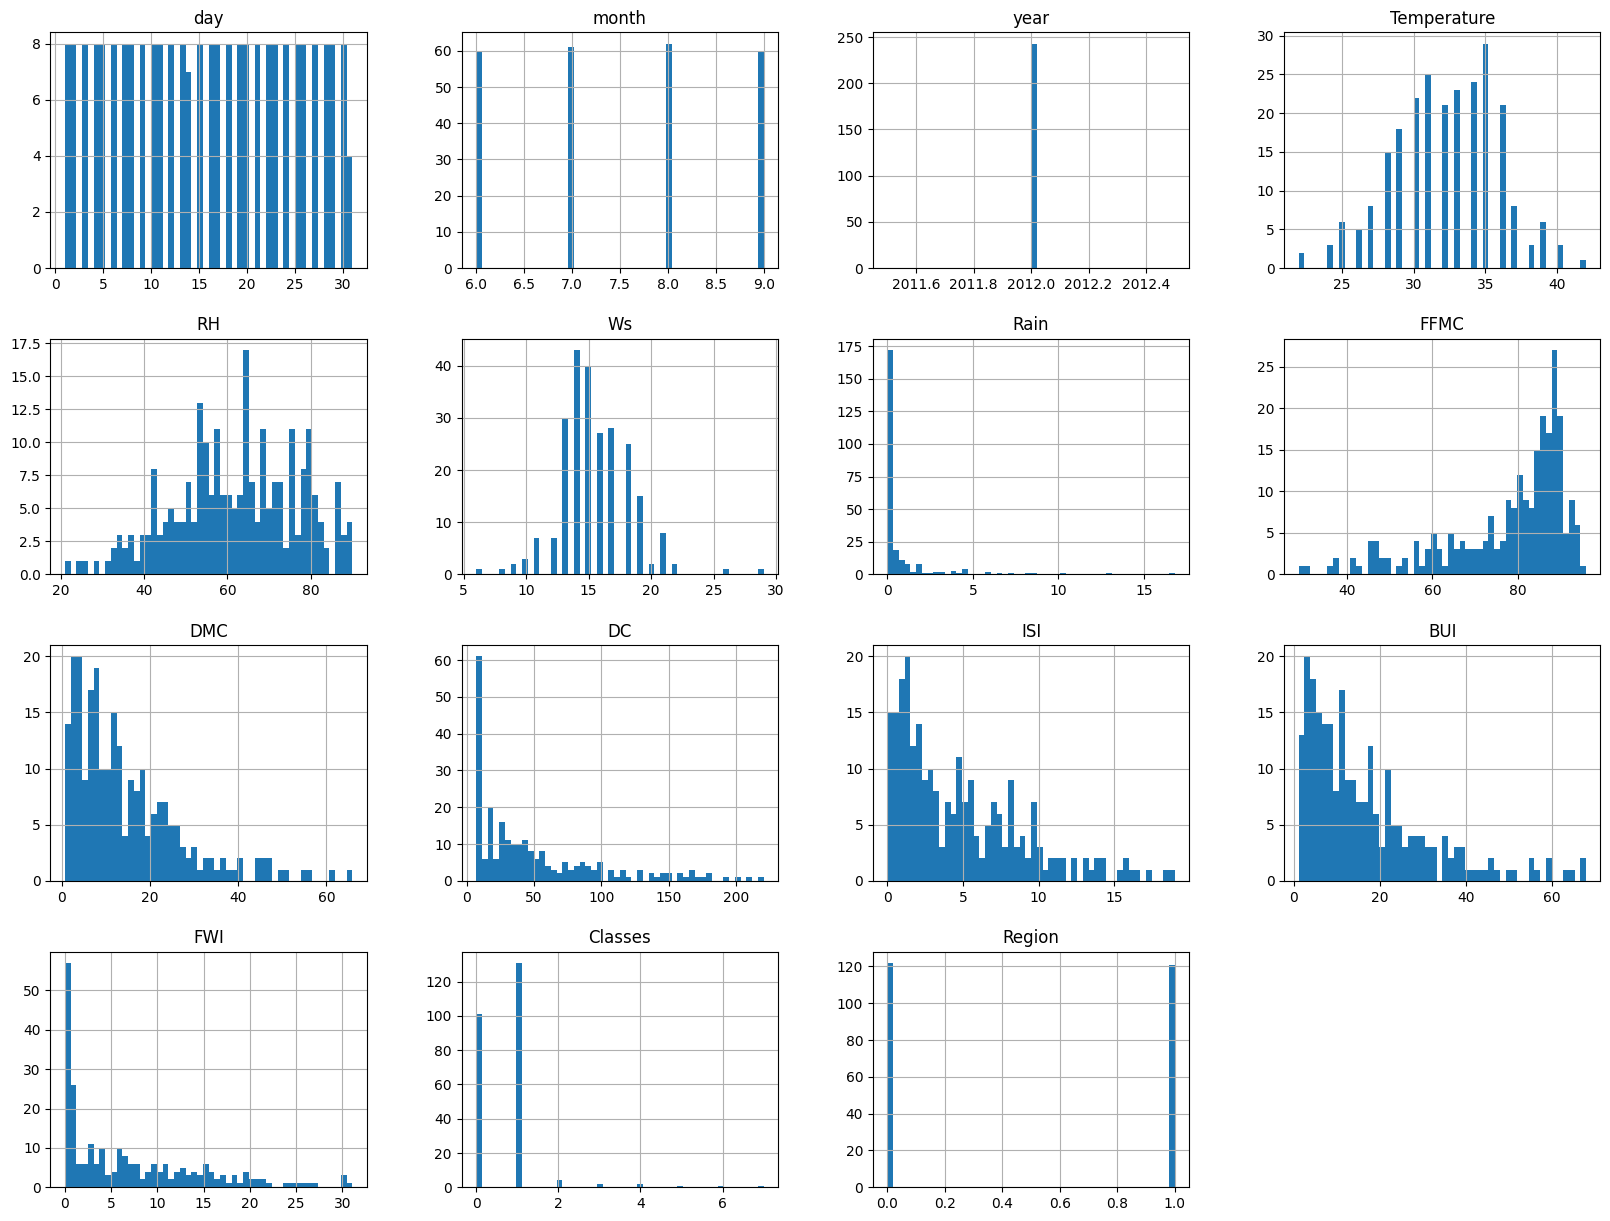

In [59]:
df.hist(bins=50, figsize=(20,15))
plt.show()

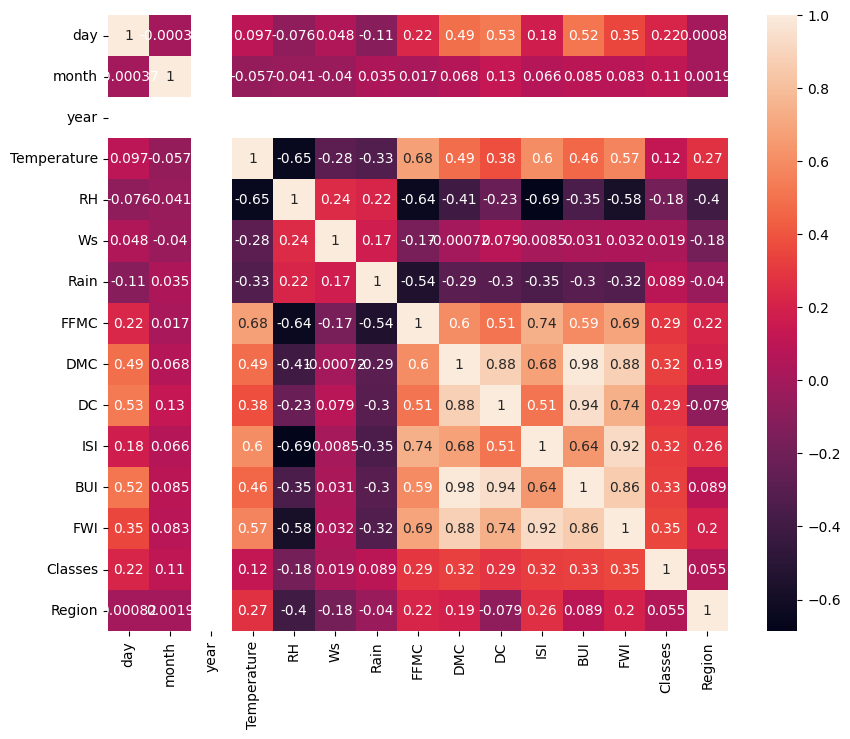

In [60]:

corr_m = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_m, annot =True)
plt.show()

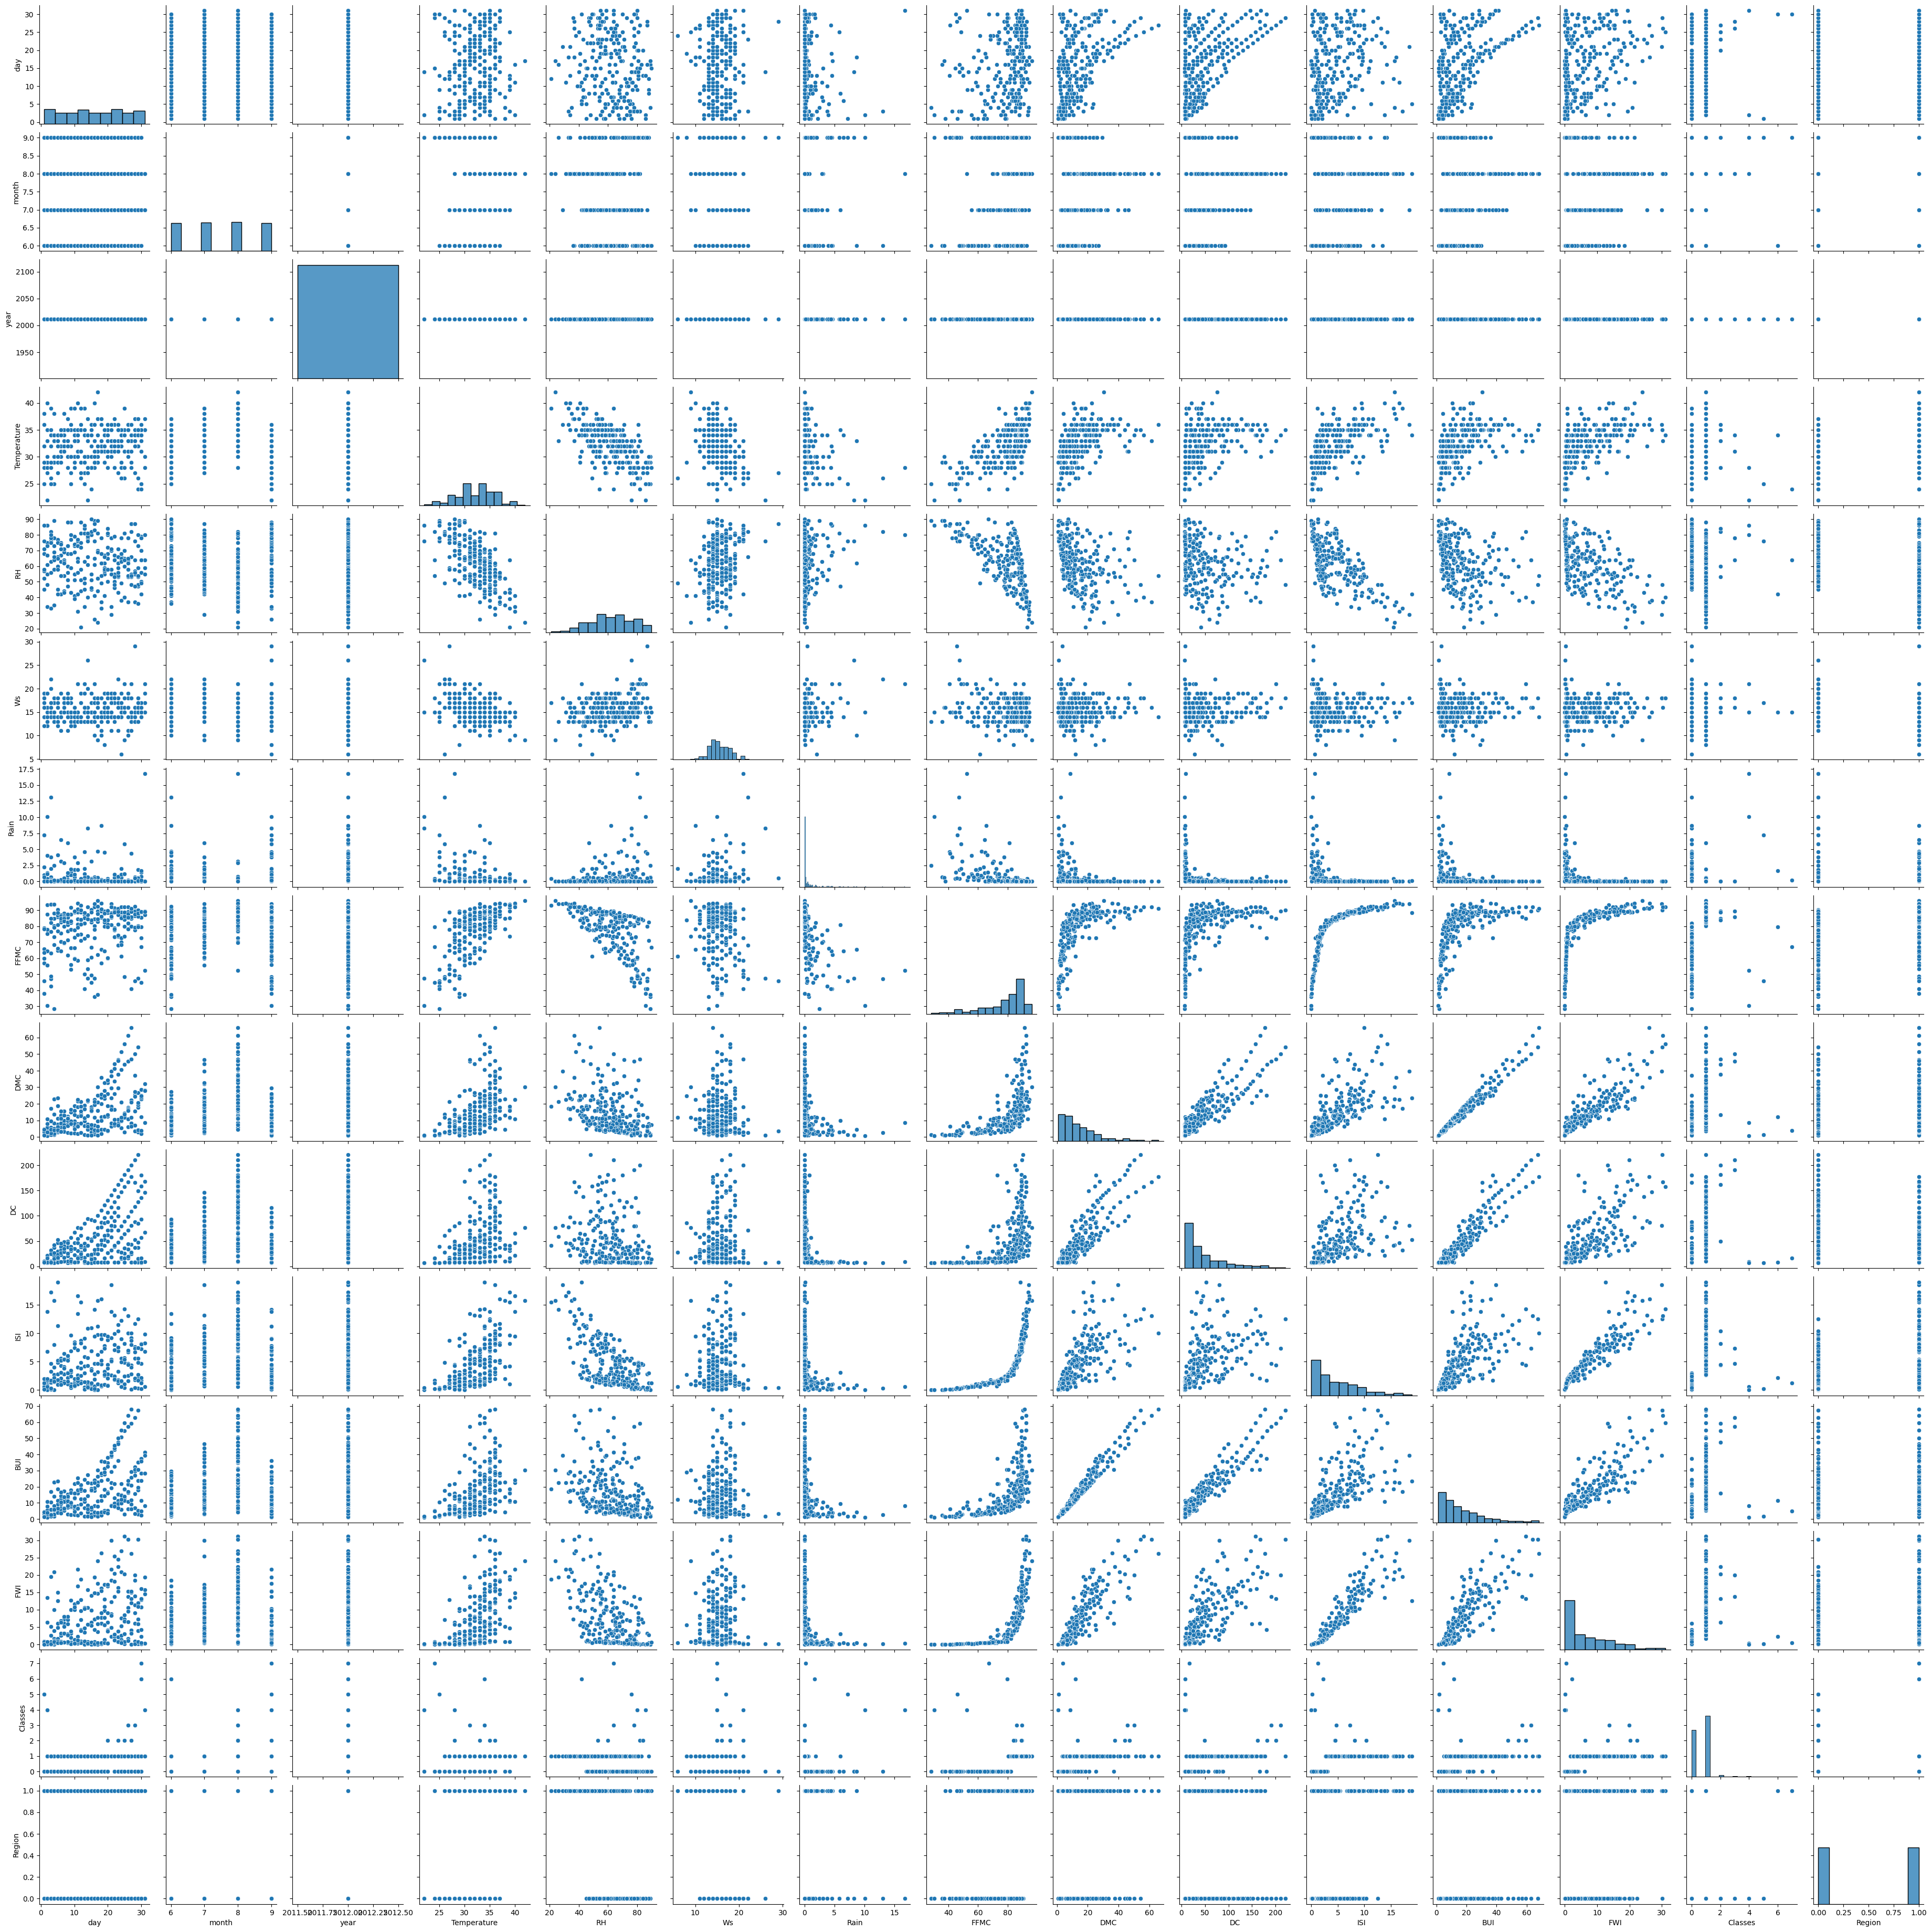

In [61]:
sns.pairplot(df)
plt.show()

In [62]:
# Initializing Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [63]:
# Initializing the PolynomialFeatures transformer with degree 2
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_poly = poly.fit_transform(X_train)  # Apply polynomial feature transformation
poly_model =LinearRegression()  # Initialize the Linear Regression model
poly_model.fit(X_poly, y_train)  # Fit the model on the transformed features

LinearRegression()

In [16]:
ridge_reg = Ridge(alpha=1.0)  # Adjust the alpha value as needed
ridge_reg.fit(X_train, y_train)  # Fit the model on the training data

Ridge()

In [64]:
lasso_reg = Lasso(alpha=0.1)  # Adjust the alpha value as needed
lasso_reg.fit(X_train, y_train)  # Fit the model on the training data

Lasso(alpha=0.1)

In [65]:
y_pred =ridge_reg.predict(X_test)   # Predict the target values for the test set using the Ridge Regression model
print("MSE:", mean_squared_error(y_test, y_pred))   # Calculate and print the Mean Squared Error (MSE) of the predictions
print("r2 score:", r2_score(y_test, y_pred))    # Calculate and print the R-squared (r2) score of the predictions

MSE: 0.38089015849729974
r2 score: 0.9874328605793663


In [66]:
y_pred = lasso_reg.predict(X_test)  # Predict the target values for the test set using the Lasso Regression model
print("MSE:", mean_squared_error(y_test, y_pred))  # Calculate and print the Mean Squared Error (MSE) of the predictions
print("r2:", r2_score(y_test, y_pred))  # Calculate and print the R-squared (r2) score of the predictions

MSE: 0.431257420013679
r2: 0.9857710366031074


In [67]:
# Performing cross-validation on the all models
# cv=5 indicates 5-fold cross-validation
# scoring='neg_mean_squared_error' to use negative mean squared error as the scoring metric
linear_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
poly_scores = cross_val_score(poly_model, X_poly, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_scores = cross_val_score(lasso_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("Linear Regression CV MSE: ", -linear_scores.mean())
print("Polynomial Regression CV MSE: ", -poly_scores.mean())
print("Ridge Regression CV MSE: ", -ridge_scores.mean())
print("Lasso Regression CV MSE: ", -lasso_scores.mean())

Linear Regression CV MSE:  2.312000605832426
Polynomial Regression CV MSE:  3.3566708204998514
Ridge Regression CV MSE:  2.3087801037761064
Lasso Regression CV MSE:  2.2781943582671382


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.714e+01, tolerance: 9.104e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.201e+00, tolerance: 1.013e+00
  model = cd_fast.enet_coordinate_descent(


In [68]:
import pickle # Import pickle for object serialization
# Serialize and save the to a file
with open('linear_regressor.pkl', 'wb') as f:
    pickle.dump(linear_model, f)
with open('poly_regressor.pkl', 'wb') as f:
    pickle.dump(poly, f)
with open('ridge_regressor.pkl', 'wb') as f:
    pickle.dump(ridge_reg, f)
with open('lasso_regressor.pkl', 'wb') as f:
    pickle.dump(lasso_reg, f)

In [69]:
num_samples = 10

# Generate synthetic data based on the typical ranges of each feature
np.random.seed(42)  # For reproducibility
synthetic_data = pd.DataFrame({
    'Temperature': np.random.uniform(20, 40, num_samples),
    'RH': np.random.uniform(10, 90, num_samples),
    'Ws': np.random.uniform(0, 20, num_samples),
    'Rain': np.random.uniform(0, 1, num_samples),
    'FFMC': np.random.uniform(80, 95, num_samples),
    'FWI':np.random.uniform(1,200,num_samples),
    'DMC': np.random.uniform(0, 200, num_samples),
    'DC': np.random.uniform(0, 800, num_samples),
    'ISI': np.random.uniform(0, 20, num_samples),
    'BUI': np.random.uniform(0, 200, num_samples),
    'Classes': np.random.choice([0, 1], num_samples),  # Include Classes feature
    'Region': np.random.choice([1, 2], num_samples)    # Include Region feature
})

# Display the generated synthetic data
print(synthetic_data)


   Temperature         RH         Ws      Rain       FFMC         FWI  \
0    27.490802  11.646760  12.237058  0.607545  81.830574  193.947341   
1    39.014286  87.592788   2.789877  0.170524  87.427654  155.251432   
2    34.639879  76.595411   5.842893  0.065052  80.515828  187.960289   
3    31.973170  26.987129   7.327237  0.948886  93.639806  179.070643   
4    23.120373  24.545997   9.121400  0.965632  83.881700  119.982096   
5    23.119890  24.672361  15.703519  0.808397  89.937834  184.452973   
6    21.161672  34.339379   3.993476  0.304614  84.675666   18.610008   
7    37.323523  51.980515  10.284689  0.097672  87.801020   40.000590   
8    32.022300  44.555601  11.848291  0.684233  88.200654   10.000230   
9    34.161452  33.298331   0.929008  0.440152  82.772817   65.740736   

          DMC          DC        ISI         BUI  Classes  Region  
0   77.735458  617.795815  17.262069   23.918849        0       1  
1   54.269806  158.972545  12.465963  142.648957        1   

In [70]:
synthetic_data.to_csv('synthetic_unseen_data.csv', index=False)  # Save the data to a CSV file

In [71]:
import pandas as pd
import numpy as np
import pickle

# Load the trained model from file
with open('linear_regressor.pkl', 'rb') as f:
    linear_model = pickle.load(f)
with open('poly_regressor.pkl', 'rb') as f:
    poly_model = pickle.load(f)
with open('ridge_regressor.pkl', 'rb') as f:
    ridge_model = pickle.load(f)
with open('lasso_regressor.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

unseen_data = pd.read_csv("synthetic_unseen_data.csv")  # Replace "path_to_unseen_data.csv" with the actual path to your unseen data



In [72]:
# Creating a new DataFrame X_unseen by dropping the "FWI" column from the unseen_data DataFrame
X_unseen = synthetic_data.drop(columns=["FWI"])

In [73]:
polynomial_features = PolynomialFeatures(degree=2)
X_unseen_poly = polynomial_features.fit_transform(X_unseen)

In [44]:
# Drop extra columns from unseen data
X_unseen = X_unseen[training_columns]

In [49]:
# Predict using the loaded models
prediction_linear = linear_model.predict(X_unseen)
prediction_poly = poly_model.predict(poly.fit_transform(X_unseen))
prediction_ridge = ridge_model.predict(X_unseen)
prediction_lasso = lasso_model.predict(X_unseen)

In [50]:
# Print the predictions
print("Linear Regression Predictions:", prediction_linear)
print("Polynomial Regression Predictions:", prediction_poly)
print("Ridge Regression Predictions:", prediction_ridge)
print("Lasso Regression Predictions:", prediction_lasso)


Linear Regression Predictions: [21.47130165 46.54215097 47.60195182 22.35182296 39.15561319 27.40586019
 35.59349548 37.83700039 16.87028658 20.2981794 ]
Polynomial Regression Predictions: [ 619.40814339  115.15955286   20.24421839   89.3615735     2.97520833
  357.8451864    75.35526752  401.65593182  166.00607699 1295.60323118]
Ridge Regression Predictions: [21.77424564 46.31136838 47.51626674 22.4365173  39.0592138  27.57100369
 35.58949332 37.93812475 16.98867494 20.65530861]
Lasso Regression Predictions: [29.92458192 40.49436184 44.40820105 24.7833933  36.74860637 31.77915878
 36.04844449 39.88494212 20.69457709 28.7103667 ]
